In [1]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

# Generate events

In [77]:
from utils import straight_tracks_generator
events = straight_tracks_generator(n_events=10, n_tracks=1, n_noise=1, sigma=0.5, intersection=False)

# Tracks Recognition

In [78]:
event = events[events.EventID == 0]
X = event.X.values
y = event.y.values

In [79]:
from LinearNaiveTrackFollowing import LinearNaiveTrackFollowing

lntf = LinearNaiveTrackFollowing(window=4, min_hits=4, n_last_fit='all')
lntf.fit(X, y)

labels = lntf.labels_
predictions = lntf.predictions_

# Plot True and Recognized Tracks

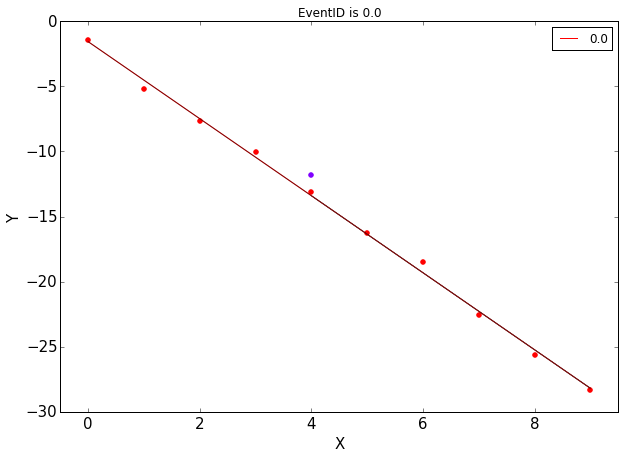

In [80]:
from utils import plot_straight_tracks
plot_straight_tracks(event, labels)
plt.xlim(-0.5, 9.5)
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [139]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(X.reshape(-1, 1)[:-1], y[:-1])


# plt.figure(figsize=(10,7))

# plt.scatter(X,y, color='r', linewidths=4)
# plt.plot(X, lr.predict(X.reshape(-1,1)), color='r', linewidth=2)

# for i in range(len(X))[3:]:
#     plt.plot(X[i-3:i], list(y[i-3:i-1]) + [predictions[i-1]], color='0.', alpha=0.5, linewidth=1)
    
# plt.scatter(X, predictions, color='0.', alpha=0.5)

# plt.xlim(-0.5, 9.5)
# plt.ylim(-20, 5)
# plt.show()

In [140]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(X.reshape(-1, 1)[:-1], y[:-1])


# plt.figure(figsize=(10,7))

# plt.scatter(X,y, color='r', linewidths=4)
# plt.plot(X, lr.predict(X.reshape(-1,1)), color='r', linewidth=2)

# for i in range(len(X))[3:]:
#     lr = LinearRegression()
#     lr.fit(X[:i-1].reshape(-1, 1), y[:i-1])
#     plt.plot(X[:i], lr.predict(X[:i].reshape(-1,1)), color='0', alpha=0.5, linewidth=1)
#     #plt.plot(X[:i], list(y[i-3:i-1]) + [predictions[i-1]], color='0.', alpha=0.5, linewidth=1)
    
# plt.scatter(X, predictions, color='0.', alpha=0.5)

# plt.xlim(-0.5, 9.5)
# plt.ylim(-20, 5)
# plt.show()

# Tracks Reconstruction Quality

## Hits Matching

In [83]:
from metrics import HitsMatchingEfficiency

hme = HitsMatchingEfficiency()
hme.fit(event, labels)

print hme.efficiencies_
print hme.avg_efficiency_
print hme.recognition_efficiency_
print hme.ghost_rate_
print hme.clone_rate_

[ 1.]
1.0
1.0
0.0
0.0


## Parameters Matching

In [84]:
from metrics import ParameterMatchingEfficiency

pme = ParameterMatchingEfficiency(delta_k = .2, delta_b=1.)
pme.fit(event, labels)

print pme.recognition_efficiency_
print pme.ghost_rate_
print pme.clone_rate_

1.0
0.0
0.0


## All Metrics for All events

In [89]:
results = pandas.DataFrame(columns=['EventID', 'HmAvgEff',
                                    'HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                    'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])

for event_id in numpy.unique(events.EventID.values):
    
    event = events[events.EventID == event_id]
    X = event.X.values
    y = event.y.values
    
    lntf = LinearNaiveTrackFollowing(window=4, min_hits=4)
    lntf.fit(X, y)
    labels = lntf.labels_
    
    hme = HitsMatchingEfficiency()
    hme.fit(event, labels)
    
    pme = ParameterMatchingEfficiency(delta_k = 0.4, delta_b=2.)
    pme.fit(event, labels)
    
    results.loc[len(results)] = [event_id, hme.avg_efficiency_, 
                                 hme.recognition_efficiency_, hme.ghost_rate_, hme.clone_rate_, 
                                 pme.recognition_efficiency_, pme.ghost_rate_, pme.clone_rate_]

In [90]:
results.head()

,EventID,HmAvgEff,HmRecoEff,HmGhostRate,HmCloneRate,PmRecoEff,PmGhostRate,PmCloneRate
0,0,0.9,1,0,0,1,0,0
1,1,1.0,1,0,0,1,0,0
2,2,1.0,1,0,0,1,0,0
3,3,1.0,1,0,0,1,0,0
4,4,1.0,1,0,0,1,0,0


In [91]:
results.mean(axis=0)

EventID        4.50
HmAvgEff       0.99
HmRecoEff      1.00
HmGhostRate    0.00
HmCloneRate    0.00
PmRecoEff      1.00
PmGhostRate    0.00
PmCloneRate    0.00
dtype: float64

# Experiments

In [133]:
def get_metrics(n_events, n_tracks):
    
    events = straight_tracks_generator(n_events=n_events, n_tracks=n_tracks, n_noise=20, sigma=0.5)
    
    results = pandas.DataFrame(columns=['EventID', 'HmAvgEff',
                                        'HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                        'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])

    for event_id in numpy.unique(events.EventID.values):

        event = events[events.EventID == event_id]
        X = event.X.values
        y = event.y.values

        lntf = LinearNaiveTrackFollowing(window=5, min_hits=4, n_last_fit='all')
        lntf.fit(X, y)
        labels = lntf.labels_

        hme = HitsMatchingEfficiency()
        hme.fit(event, labels)

        pme = ParameterMatchingEfficiency(delta_k = 0.2, delta_b=1.0)
        pme.fit(event, labels)

        results.loc[len(results)] = [event_id, hme.avg_efficiency_, 
                                     hme.recognition_efficiency_, hme.ghost_rate_, hme.clone_rate_, 
                                     pme.recognition_efficiency_, pme.ghost_rate_, pme.clone_rate_]
        
    metrics = results[['HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                       'PmRecoEff', 'PmGhostRate', 'PmCloneRate']].values.mean(axis=0)
    
    return metrics

def get_metrics_dependencies(n_events, n_tracks):
    
    results = pandas.DataFrame(columns=['HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                        'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])
    
    for i in n_tracks:
        
        results.loc[len(results)] = get_metrics(n_events, i)
        
    return results

In [134]:
n_tracks = [1, 2, 3, 4, 5, 7, 10, 12, 15, 20]
results2 = get_metrics_dependencies(500, n_tracks)
results2.head()

,HmRecoEff,HmGhostRate,HmCloneRate,PmRecoEff,PmGhostRate,PmCloneRate
0,0.9920,0.352000,0.000000,0.9820,0.356000,0.006000
1,0.9400,0.242000,0.012000,0.9080,0.282000,0.004000
2,0.9160,0.200667,0.021333,0.8640,0.264667,0.009333
3,0.9055,0.171500,0.025500,0.8465,0.242500,0.013500
4,0.8476,0.178400,0.039600,0.7736,0.275200,0.016800


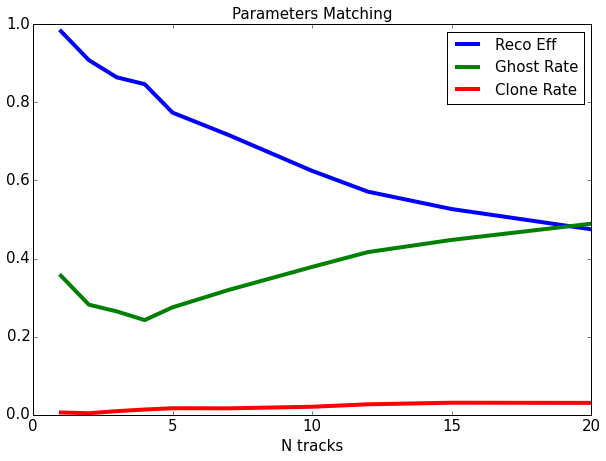

In [135]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results2['PmRecoEff'].values, linewidth=4, label='Reco Eff')
plt.plot(n_tracks, results2['PmGhostRate'].values, linewidth=4, label='Ghost Rate')
plt.plot(n_tracks, results2['PmCloneRate'].values, linewidth=4, label='Clone Rate')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Parameters Matching', size=15)
plt.show()

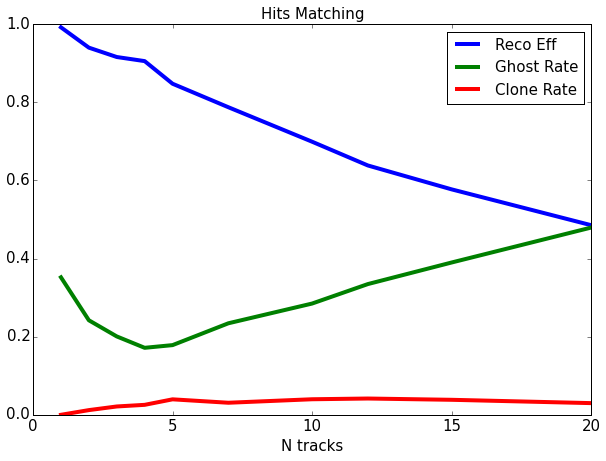

In [136]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results2['HmRecoEff'].values, linewidth=4, label='Reco Eff')
plt.plot(n_tracks, results2['HmGhostRate'].values, linewidth=4, label='Ghost Rate')
plt.plot(n_tracks, results2['HmCloneRate'].values, linewidth=4, label='Clone Rate')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Hits Matching', size=15)
plt.show()

# Simple Template Matching as Baseline

In [127]:
from TemplateMatching import SimpleTemplateMatching
def get_metrics_baseline(n_events, n_tracks):
    
    events = straight_tracks_generator(n_events=n_events, n_tracks=n_tracks, n_noise=20, sigma=0.5)
    
    results = pandas.DataFrame(columns=['EventID', 'HmAvgEff',
                                        'HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                        'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])

    for event_id in numpy.unique(events.EventID.values):

        event = events[events.EventID == event_id]
        X = event.X.values.reshape(-1,1)
        y = event.y.values

        stm = SimpleTemplateMatching(8, 1.)
        stm.fit(X, y)
        labels = stm.labels_

        hme = HitsMatchingEfficiency()
        hme.fit(event, labels)

        pme = ParameterMatchingEfficiency(delta_k = 0.2, delta_b=1.0)
        pme.fit(event, labels)

        results.loc[len(results)] = [event_id, hme.avg_efficiency_, 
                                     hme.recognition_efficiency_, hme.ghost_rate_, hme.clone_rate_, 
                                     pme.recognition_efficiency_, pme.ghost_rate_, pme.clone_rate_]
        
    metrics = results[['HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                       'PmRecoEff', 'PmGhostRate', 'PmCloneRate']].values.mean(axis=0)
    
    return metrics

def get_metrics_dependencies_baseline(n_events, n_tracks):
    
    results = pandas.DataFrame(columns=['HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                        'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])
    
    for i in n_tracks:
        
        results.loc[len(results)] = get_metrics_baseline(n_events, i)
        
    return results

In [128]:
results3 = get_metrics_dependencies_baseline(500, n_tracks)
results3.head()

,HmRecoEff,HmGhostRate,HmCloneRate,PmRecoEff,PmGhostRate,PmCloneRate
0,0.980000,0.086000,0.0000,0.908000,0.158000,0.000000
1,0.950000,0.094000,0.0180,0.855000,0.205000,0.002000
2,0.900667,0.114667,0.0260,0.817333,0.218667,0.005333
3,0.825000,0.181500,0.0320,0.711000,0.323500,0.004000
4,0.767600,0.250000,0.0192,0.665200,0.366800,0.004800


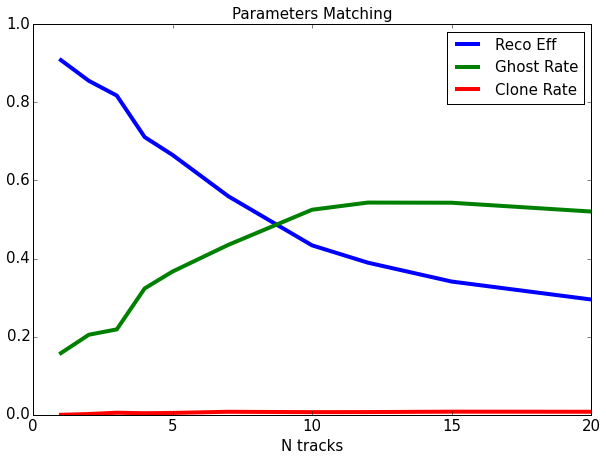

In [129]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results3['PmRecoEff'].values, linewidth=4, label='Reco Eff')
plt.plot(n_tracks, results3['PmGhostRate'].values, linewidth=4, label='Ghost Rate')
plt.plot(n_tracks, results3['PmCloneRate'].values, linewidth=4, label='Clone Rate')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Parameters Matching', size=15)
plt.show()

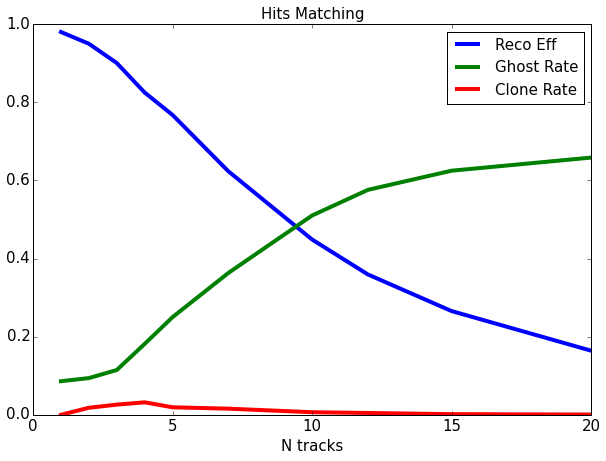

In [130]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results3['HmRecoEff'].values, linewidth=4, label='Reco Eff')
plt.plot(n_tracks, results3['HmGhostRate'].values, linewidth=4, label='Ghost Rate')
plt.plot(n_tracks, results3['HmCloneRate'].values, linewidth=4, label='Clone Rate')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Hits Matching', size=15)
plt.show()

# Naive and Simple Template Matching

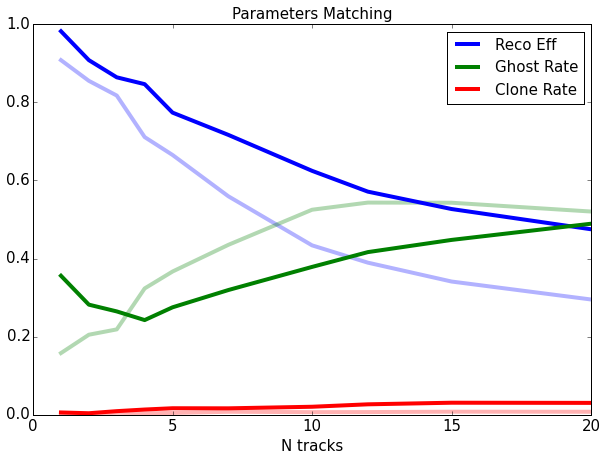

In [137]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results3['PmRecoEff'].values, linewidth=4, alpha=0.3, color='b')
plt.plot(n_tracks, results3['PmGhostRate'].values, linewidth=4, alpha=0.3, color='g')
plt.plot(n_tracks, results3['PmCloneRate'].values, linewidth=4, alpha=0.3, color='r')
plt.plot(n_tracks, results2['PmRecoEff'].values, linewidth=4, label='Reco Eff', color='b')
plt.plot(n_tracks, results2['PmGhostRate'].values, linewidth=4, label='Ghost Rate', color='g')
plt.plot(n_tracks, results2['PmCloneRate'].values, linewidth=4, label='Clone Rate', color='r')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Parameters Matching', size=15)
plt.show()

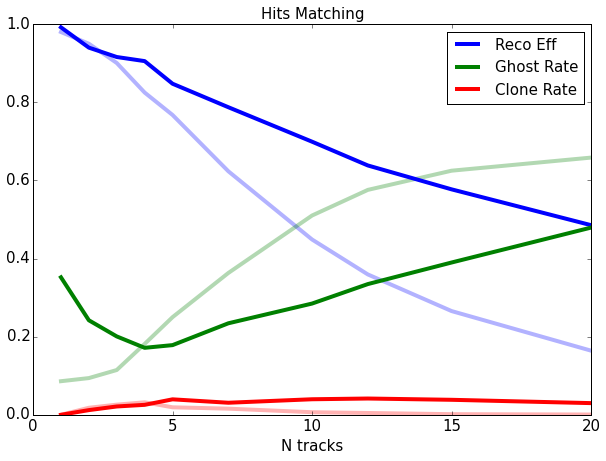

In [138]:
plt.figure(figsize=(10, 7))
plt.plot(n_tracks, results3['HmRecoEff'].values, linewidth=4, alpha=0.3, color='b')
plt.plot(n_tracks, results3['HmGhostRate'].values, linewidth=4, alpha=0.3, color='g')
plt.plot(n_tracks, results3['HmCloneRate'].values, linewidth=4, alpha=0.3, color='r')
plt.plot(n_tracks, results2['HmRecoEff'].values, linewidth=4, label='Reco Eff', color='b')
plt.plot(n_tracks, results2['HmGhostRate'].values, linewidth=4, label='Ghost Rate', color='g')
plt.plot(n_tracks, results2['HmCloneRate'].values, linewidth=4, label='Clone Rate', color='r')
plt.legend(loc='best', prop={'size':15})
plt.xlabel('N tracks', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Hits Matching', size=15)
plt.show()